In [1]:
import cv2     # Thư viện OpenCV
import numpy as np   # Thư viện numy để làm việc dữ liệu kiểu mảng
import matplotlib.pyplot as plt # import thư viện matplotlib để vẽ ảnh

In [2]:
# Định nghĩa hàm Tich_chap() để lọc Trung bình, Trung bình có trọng số và lọc Gaussian
def Tich_chap(img,mask):
    m, n = img.shape
    img_new = np.zeros([m, n])
    for i in range(1, m-1):
        for j in range(1, n-1):
            temp   =  img[i-1, j-1]    * mask[0, 0]\
                   +  img[i, j-1]      * mask[0, 1]\
                   +  img[i+1, j - 1]  * mask[0, 2]\
                   +  img[i-1, j]      * mask[1, 0]\
                   +  img[i, j]        * mask[1, 1]\
                   +  img[i+1, j]      * mask[1, 2]\
                   +  img[i - 1, j+1]  * mask[2, 0]\
                   +  img[i, j + 1]    * mask[2, 1]\
                   +  img[i + 1, j + 1]* mask[2, 2]
            img_new[i, j]= temp
    img_new = img_new.astype(np.uint8)
    return img_new

In [3]:
# Định nghĩa Sobel theo hướng X
locSobelX = np.array(([-1,-2,-1],
                      [ 0, 0, 0],
                      [ 1, 2, 1]), dtype="float")

# Định nghĩa bộ lọc Sobel theo hướng Y
locSobelY = np.array(([-1, 0, 1],
                      [-2, 0, 2],
                      [ 1, 0, 1]), dtype="float")

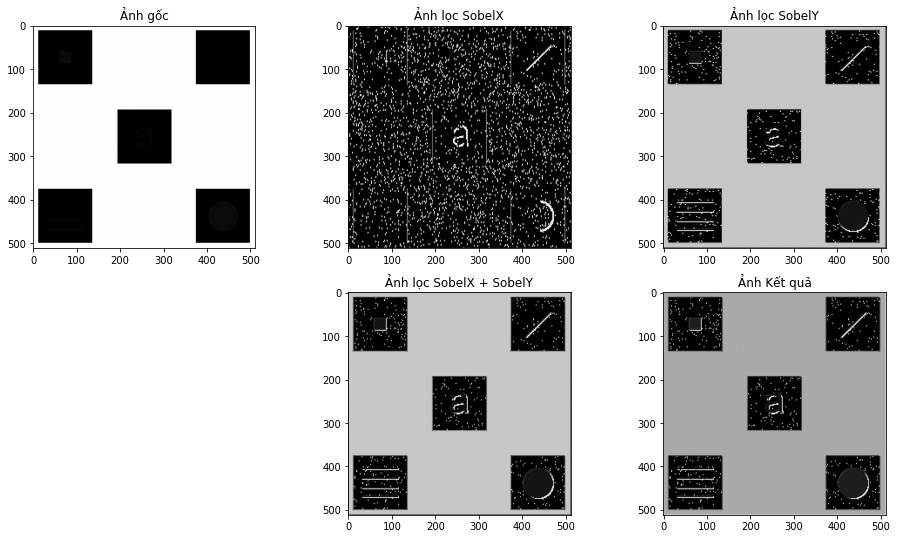

In [6]:
fig = plt.figure(figsize=(16, 9)) # Tạo vùng vẽ tỷ lệ 16:9
(ax1, ax2, ax3), (ax4, ax5, ax6) = fig.subplots(2, 3) # Tạo 6 vùng vẽ con

# Đọc và hiển thị ảnh gốc
image = cv2.imread('/content/test2.tif', 0)
ax1.imshow(image, cmap='gray')
ax1.set_title("Ảnh gốc")

# Lọc Sobel theo hướng X và hiển thị ảnh
imgSobelX = Tich_chap(image, locSobelX) #Gọi hàm tích chập
ax2.imshow(imgSobelX, cmap='gray')
ax2.set_title("Ảnh lọc SobelX")

# Lọc Sobel theo hướng Y và hiển thị ảnh
imgSobelY = Tich_chap(image, locSobelY) #Gọi hàm tích chập
ax3.imshow(imgSobelY, cmap='gray')
ax3.set_title("Ảnh lọc SobelY")

ax4.axis('off')

# Ảnh tổng Sobel theo hướng Y và Sobel theo hướng Y và hiển thị ảnh
imgSobelXY = imgSobelX + imgSobelY
ax5.imshow(imgSobelXY, cmap='gray')
ax5.set_title("Ảnh lọc SobelX + SobelY")

# Ảnh cuối cùng = ảnh gốc + ảnh tổng Sobel theo hướng Y
# và Sobel theo hướng Y và hiển thị ảnh
imgSobel_ketqua = image + imgSobelXY
ax6.imshow(imgSobel_ketqua, cmap='gray')
ax6.set_title("Ảnh Kết quả")

# Hiển thị vùng vẽ
plt.show()